# Welcome to My Notebook
##### made by zacky

Hello and welcome! This notebook is your guide to exploring the captivating realm of Greater Manchester homes from 2014 to 2020. During this time period, we saw a range of price increases to decreases and i will be exploring that in this notebook!

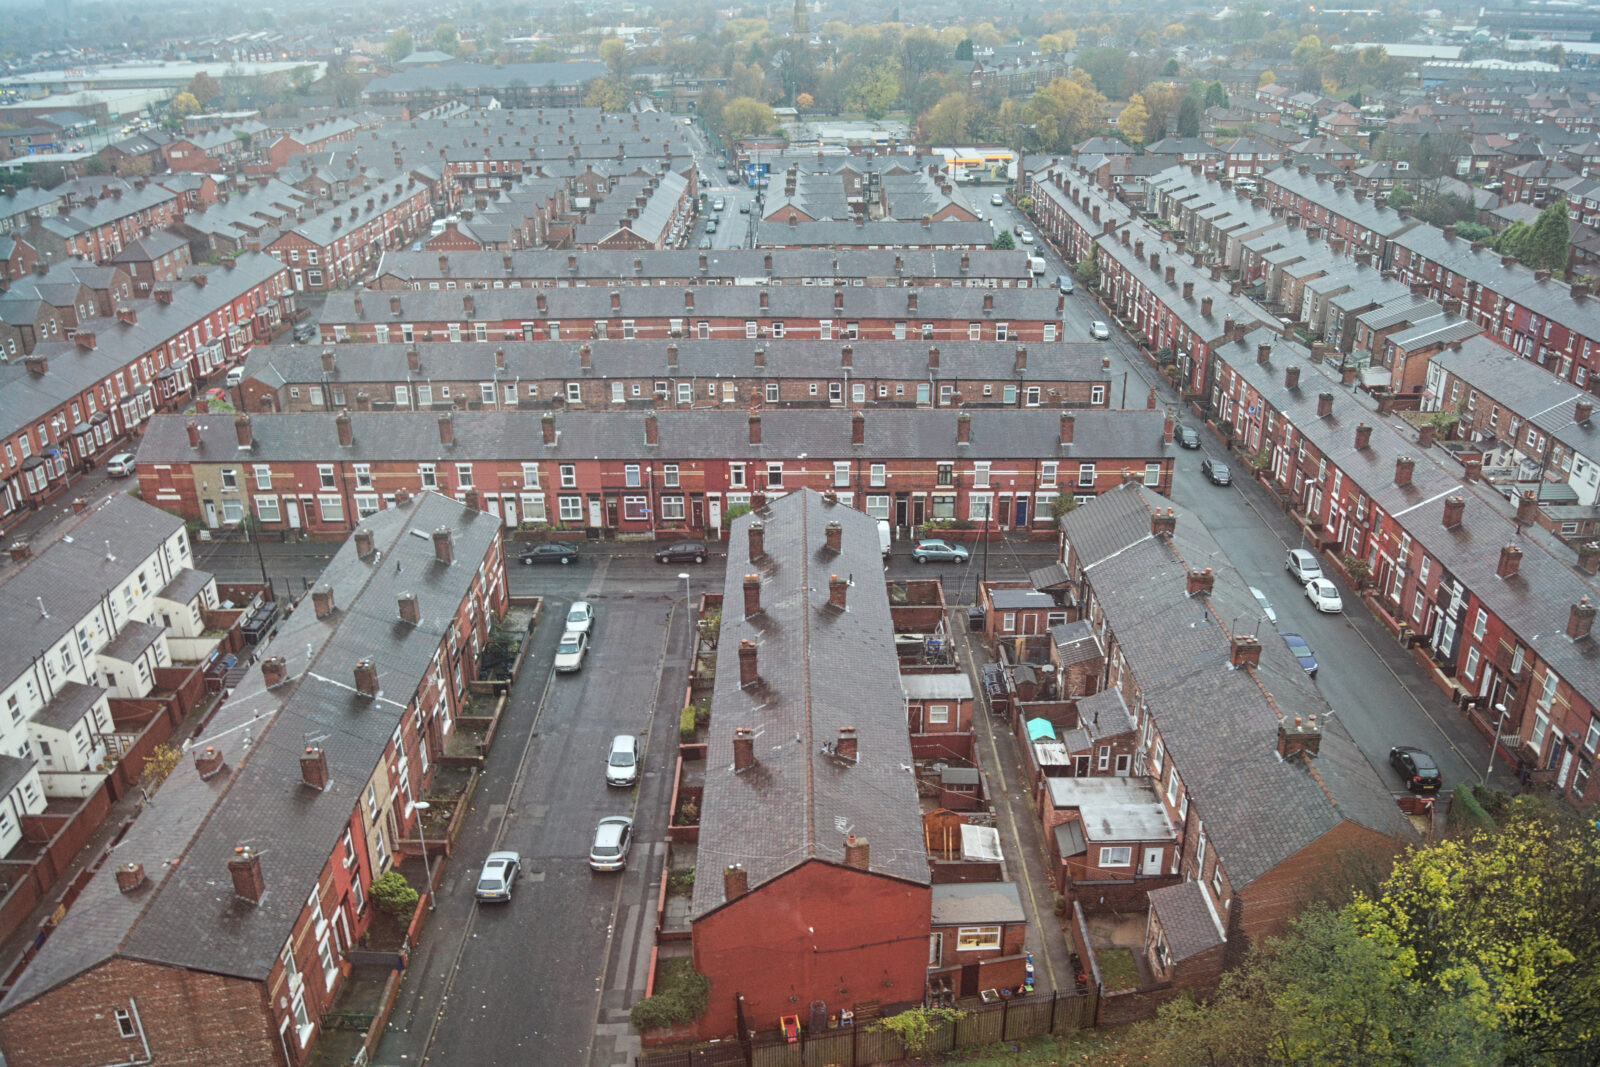

## What is inside?

Let's dive into the sections for a seamless journey:
This journey would involve 3 crucial topics that we will dive down together to analyse the dataset on the properties. Data Importing, Data Cleaning, Data Analysis

### 1) Importing libraries and datasets 📚

Our first stop involves setting up the stage. We'll import the essential libraries for data cleaning and analysis. If you're new to this, don't worry—I've included instructions on library installations for both Visual Studio Code and JupyterLab/Jupyter Notebook.

### 2) Cleaing the Dataset 🧹

Let's take care of our precious data gem through a three-step cleaning process. First, we'll fine-tune individual columns, then give the entire dataset a makeover. Lastly, we'll make sure to clear out any dust bunnies in the form of NaN or NaT values.

### 3) Exporting to Tableau/Power bi for visualisations (seperate file) 🖥️

To bring our findings to life, we're exporting the polished data as an Excel sheet. This file will seamlessly integrate into Tableau or Power BI, offering a visual feast. Check out the separate file within the zip folder for the cinematic experience.

### 4) Data Analysis (python) 📈

Time for the thrilling part! Using Python, we'll answer specific questions and uncover trends within the dataset. Consider it our compass guiding us through the twists and turns of the Greater Manchester property landscape.
 
### 5) Conclusion ✅

I will finally conclude this adventure with a general conclusion based on the analysis that i have encovered within the dataset and give a closing statement

### 6) References 🗒️

Referencing the dataset that was used for the analysis

# Importing libraries and the datasets

In [1]:
#to install libraries on jupyter/visual studio code 

#you must have python installed 

# pip install [the library you need] - for vs
# !pip install [the library you need] - for jupyter

In [110]:
import pandas as pd # for importing and cleaning the dataset
import numpy as np # for numerical calculations
import re
import warnings # surpressing any warnings we may come across

#for notebook analysis
import matplotlib.pyplot as plt # for data visualisation
from matplotlib.ticker import MaxNLocator
from matplotlib.dates import DateFormatter
import plotly.express as px
import seaborn as sbn # for statistical visualisation

#for machine learning/text analysis
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud
from collections import Counter
import spacy

#for export to tableau
import openpyxl # for exporting data
import random

#if on visual studio 
#using the kaggle api to download the dataset would be a quicker option
#type pip install kaggle - to install the kaggle api onto visual studio
#then copy the json file from your account to your .kaggle folder onto your PC.

#import kaggle

In [3]:
#declaring "data" as the read csv file using the pandas library
data = pd.read_csv(r"manchester_properties_for_sale.csv", low_memory = False)

#calling warnings to create a simple filter that ignoers actions.
warnings.simplefilter(action='ignore', category=pd.errors.DtypeWarning)

## Data exploration

We are now going to explore the data further to see what kind of data types we may have available to us and if some of these data types would be useful to our analysis

In [4]:
data.shape # displays the size of the data set

(16566, 37)

In [5]:
# .info() is a function that is show columns, Non-Null count and the data types within the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16566 entries, 0 to 16565
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   16566 non-null  int64  
 1   id                           16566 non-null  int64  
 2   bedrooms                     16566 non-null  int64  
 3   numberOfImages               16566 non-null  int64  
 4   numberOfFloorplans           16566 non-null  int64  
 5   numberOfVirtualTours         16566 non-null  int64  
 6   summary                      16566 non-null  object 
 7   displayAddress               16566 non-null  object 
 8   propertySubType              16566 non-null  object 
 9   premiumListing               16566 non-null  bool   
 10  featuredProperty             16566 non-null  bool   
 11  price                        16566 non-null  int64  
 12  transactionType              16566 non-null  object 
 13  commercial      

Judging by the datatypes above, we can see that 11 of the 36 columns are booleans, this may not be useful for later analysis however when it comes to tableau, it may be particularly useful if we want to filter data that show cases each condition if it is met

many of the columns here such as salary aren't particularly useful as we can't get the full count of each of the summary due to different value types.

In [6]:
# .columns displays the column names of each of the columns within the dataset
data.columns

Index(['Unnamed: 0', 'id', 'bedrooms', 'numberOfImages', 'numberOfFloorplans',
       'numberOfVirtualTours', 'summary', 'displayAddress', 'propertySubType',
       'premiumListing', 'featuredProperty', 'price', 'transactionType',
       'commercial', 'development', 'residential', 'students', 'auction',
       'feesApply', 'displaySize', 'channel', 'firstVisibleDate',
       'onlineViewingsAvailable', 'heading', 'formattedBranchName',
       'addedOrReduced', 'isRecent', 'hasBrandPlus',
       'propertyTypeFullDescription', 'latitude', 'longitude', 'displayPrice',
       'listingUpdateReason', 'listingUpdateDate', 'branchName',
       'branchLocation', 'region_id'],
      dtype='object')

The columns themselves seemed to be messy, this may cause issues for when i would need to my analysis later on, so i will clean the columns within the data cleaning section

Judging from the columns displayed here onto the dataset - I can tell what each of these columns are for within the dataset 

1) id - relates to the customers/landlords property id within the Greater Manchester Market
2) bedrooms - The total number of bedrooms that the house has
3) numberOfImages - the total of images the posting has on a particular house
4) numberOffFloorplans - the total number of floor plans that the house has listed
5) numberOfVirtualTours - the total number of tours that the property has done over the course of the dataset
6) summary - Total string summary of a property that the landlord or agency has put up. Typically these can vary in length
7) displayAddress - The properties address that is located within Greater Manchester
8) propertySubType - The different property types that Greater Manchester has to offer
9) premiumListing - Checks to see if the property is premium
10) featureProperty - Checks to see if the property is featured
11) price - The total price of the property
12) TransactionType - The type of transaction that would occur

[continue more description on the columns]

In [7]:
data.head() #display the top 5 rows within the dataset

Unnamed: 0         id  bedrooms  numberOfImages  numberOfFloorplans  \
0           0  100178015         1              10                   2   
1           2   86441701         1               5                   0   
2           3   86105770         2               6                   1   
3           4   82563871         1               9                   1   
4           5   74643964         2               9                   1   

   numberOfVirtualTours                                            summary  \
0                     0  Modern one-bedroom student apartment with high...   
1                     1  GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2                     1  FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3                     2  MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4                     0  Attention investors! A superb purpose built ap...   

                                      displayAddress propertySubType  \
0  Completed Buy to Let City Flat, Chapel Street,...            Flat   
1  121 High Street, Little Lever, Bolton, Lancash...            Flat   
2                 Spindletree Avenue, Manchester, M9       Apartment   
3               Louise Street, Smallbridge, OL12 9RT        Terraced   
4                     Cowburn Street, Hindley, Wigan            Flat   

   premiumListing  ...  hasBrandPlus        propertyTypeFullDescription  \
0           False  ...          True            1 bedroom flat for sale   
1           False  ...          True            1 bedroom flat for sale   
2           False  ...          True       2 bedroom apartment for sale   
3            True  ...          True  1 bedroom terraced house for sale   
4           False  ...          True            2 bedroom flat for sale   

    latitude  longitude  displayPrice  listingUpdateReason  listingUpdateDate  \
0  53.483380  -2.262770       50000.0                  new                NaN   
1  53.561379  -2.368069       50000.0        price_reduced                NaN   
2  53.528936  -2.194279       50000.0                  new                NaN   
3  53.632546  -2.137368       50000.0                  new                NaN   
4  53.540290  -2.563275       50000.0                  new                NaN   

                     branchName     branchLocation  region_id  
0                     RW Invest          Liverpool  E05000766  
1        PUGH & COMPANY LIMITED  Newton-Le-Willows  E05000664  
2                 Auction House         Manchester  E05000693  
3                   Martin & Co           Rochdale  E05000753  
4  Morgan H Lewis Estate Agents              Wigan  E05000849  

[5 rows x 37 columns]

In [8]:
data.tail() #display the bottom 5 rows within the dataset

Unnamed: 0         id  bedrooms  numberOfImages  numberOfFloorplans  \
16561       24510   87145663         3               9                   2   
16562       24515   92860748         3              27                   0   
16563       24519  100383119         2              11                   0   
16564       24522  100307678         2              11                   0   
16565       24533  100263071         3              35                   1   

       numberOfVirtualTours  \
16561                     1   
16562                     1   
16563                     1   
16564                     1   
16565                     0   

                                                 summary  \
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                               displayAddress propertySubType  premiumListing  \
16561  Boothroyden Road,\r\nMiddleton,\r\nM24   Semi-Detached           False   
16562        14 Amberley Drive, Irlam M44 6BG   Semi-Detached           False   
16563      Regent Road,\r\nSalford,\r\nM5 3GY       Apartment            True   
16564      Regent Road,\r\nSalford,\r\nM5 3GY       Apartment            True   
16565        The Crest, Droylsden, Manchester           House           False   

       ...  hasBrandPlus             propertyTypeFullDescription   latitude  \
16561  ...          True  3 bedroom semi-detached house for sale  53.542690   
16562  ...          True  3 bedroom semi-detached house for sale  53.445241   
16563  ...          True            2 bedroom apartment for sale  53.476900   
16564  ...          True            2 bedroom apartment for sale  53.476900   
16565  ...          True                3 bedroom house for sale  53.473201   

       longitude  displayPrice  listingUpdateReason  listingUpdateDate  \
16561  -2.226770      214995.0                  new                NaN   
16562  -2.420522      214995.0        price_reduced                NaN   
16563  -2.269510      214699.0                  new                NaN   
16564  -2.269510      213450.0                  new                NaN   
16565  -2.149201      210000.0                  new                NaN   

                   branchName  branchLocation  region_id  
16561              Elan Homes      Millfields  E05000754  
16562         Chris Wilkinson           Irlam  E05000765  
16563  TK PROPERTY GROUP LTD     Regent Plaza  E05000770  
16564  TK PROPERTY GROUP LTD     Regent Plaza  E05000770  
16565   Keenans Estate Agents         Swinton  E05000807  

[5 rows x 37 columns]

In [9]:
data

Unnamed: 0         id  bedrooms  numberOfImages  numberOfFloorplans  \
0               0  100178015         1              10                   2   
1               2   86441701         1               5                   0   
2               3   86105770         2               6                   1   
3               4   82563871         1               9                   1   
4               5   74643964         2               9                   1   
...           ...        ...       ...             ...                 ...   
16561       24510   87145663         3               9                   2   
16562       24515   92860748         3              27                   0   
16563       24519  100383119         2              11                   0   
16564       24522  100307678         2              11                   0   
16565       24533  100263071         3              35                   1   

       numberOfVirtualTours  \
0                         0   
1                         1   
2                         1   
3                         2   
4                         0   
...                     ...   
16561                     1   
16562                     1   
16563                     1   
16564                     1   
16565                     0   

                                                 summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                          displayAddress propertySubType  \
0      Completed Buy to Let City Flat, Chapel Street,...            Flat   
1      121 High Street, Little Lever, Bolton, Lancash...            Flat   
2                     Spindletree Avenue, Manchester, M9       Apartment   
3                   Louise Street, Smallbridge, OL12 9RT        Terraced   
4                         Cowburn Street, Hindley, Wigan            Flat   
...                                                  ...             ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24   Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG   Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY       Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY       Apartment   
16565                   The Crest, Droylsden, Manchester           House   

       premiumListing  ...  hasBrandPlus  \
0               False  ...          True   
1               False  ...          True   
2               False  ...          True   
3                True  ...          True   
4               False  ...          True   
...               ...  ...           ...   
16561           False  ...          True   
16562           False  ...          True   
16563            True  ...          True   
16564            True  ...          True   
16565           False  ...          True   

                  propertyTypeFullDescription   latitude  longitude  \
0                     1 bedroom flat for sale  53.483380  -2.262770   
1                     1 bedroom flat for sale  53.561379  -2.368069   
2                2 bedroom apartment for sale  53.528936  -2.194279   
3           1 bedroom terraced house for sale  53.632546  -2.137368   
4                     2 bedroom flat for sale  53.540290  -2.563275   
...                                       ...        ...        ...   
16561  3 bedroom semi-detached house 

# Data Cleaning

In this section of this project, I will be cleaning the dataset of any dirty columns, data values and would be providng the data set with a relevant and clear outline for visualisations. I aim to provide a dataset with a pristine clarity. This preparatory step is not merely about tidying data. By ensuring the dataset's integrity, we set the stage for compelling visual narratives that go beyond numbers, offering a clear and insightful outline for our exploration of properties in Greater Manchester.

## Cleaning the columns

In this section, i will be deleting and changing the name of columns to help the dataset look more clean and prestine i will first start by look through the values of each column

### Deleting Columns

In [10]:
columnsDropped = ['Unnamed: 0', 'displaySize', 'firstVisibleDate', 'heading', 'listingUpdateDate']
newData = data.drop(columns=columnsDropped, axis=1)

In [11]:
newData

id  bedrooms  numberOfImages  numberOfFloorplans  \
0      100178015         1              10                   2   
1       86441701         1               5                   0   
2       86105770         2               6                   1   
3       82563871         1               9                   1   
4       74643964         2               9                   1   
...          ...       ...             ...                 ...   
16561   87145663         3               9                   2   
16562   92860748         3              27                   0   
16563  100383119         2              11                   0   
16564  100307678         2              11                   0   
16565  100263071         3              35                   1   

       numberOfVirtualTours  \
0                         0   
1                         1   
2                         1   
3                         2   
4                         0   
...                     ...   
16561                     1   
16562                     1   
16563                     1   
16564                     1   
16565                     0   

                                                 summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                          displayAddress propertySubType  \
0      Completed Buy to Let City Flat, Chapel Street,...            Flat   
1      121 High Street, Little Lever, Bolton, Lancash...            Flat   
2                     Spindletree Avenue, Manchester, M9       Apartment   
3                   Louise Street, Smallbridge, OL12 9RT        Terraced   
4                         Cowburn Street, Hindley, Wigan            Flat   
...                                                  ...             ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24   Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG   Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY       Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY       Apartment   
16565                   The Crest, Droylsden, Manchester           House   

       premiumListing  featuredProperty  ...  isRecent hasBrandPlus  \
0               False              True  ...     False         True   
1               False             False  ...     False         True   
2               False             False  ...     False         True   
3                True             False  ...     False         True   
4               False             False  ...     False         True   
...               ...               ...  ...       ...          ...   
16561           False             False  ...      True         True   
16562           False             False  ...      True         True   
16563            True             False  ...     False         True   
16564            True             False  ...     False         True   
16565           False             False  ...     False         True   

                  propertyTypeFullDescription   latitude  longitude  \
0                     1 bedroom flat for sale  53.483380  -2.262770   
1                     1 bedroom flat for sale  53.561379  -2.368069   
2                2 bedroom apartment for sale  53.528936  -2.194279   
3           1 bedroom terraced house for sale  53.632546  -2.137368   
4     

we've dropped the columns that were unnecassary and now we must clean the title of the columns to make it a little more presentable for tableau but also for views and jupyter

### Changing Titles Columns

Now we will begin to change the title of the columns, This is to ensure that is looks clean and neat, we want readable titles so that we can understand what the column is all about. Lets take a look at the columns within the new dataset we have just defined

In [12]:
newData.columns

Index(['id', 'bedrooms', 'numberOfImages', 'numberOfFloorplans',
       'numberOfVirtualTours', 'summary', 'displayAddress', 'propertySubType',
       'premiumListing', 'featuredProperty', 'price', 'transactionType',
       'commercial', 'development', 'residential', 'students', 'auction',
       'feesApply', 'channel', 'onlineViewingsAvailable',
       'formattedBranchName', 'addedOrReduced', 'isRecent', 'hasBrandPlus',
       'propertyTypeFullDescription', 'latitude', 'longitude', 'displayPrice',
       'listingUpdateReason', 'branchName', 'branchLocation', 'region_id'],
      dtype='object')

I can see what the columns are intended for however, it would be a lot better if we changed some of the columns to seperate some of the words.

In [13]:
# Creating a dictionary of new titles

newcolNames = {
    "bedrooms" : "Number_Of_Bedrooms",
    "numberOfImages": "Number_Of_Images",
    "numberOfFloorplans" : "Number_Of_Floorplans",
    "numberOfVirtualTours" : "Number_Of_Virtual_Tours",
    "summary" : "Summary",
    "displayAddress" : "Display_Address",
    "propertySubType" : "Subtype_Of_Property",
    "price" : "Price",
    "transactionType" : "Transaction_Type",
    "onlineViewingsAvailable" : "Online_Viewings_Available",
    "formattedBranchName" : "Formatter_Branch_Name",
    "addedOrReduced" : "Added_Or_Reduced",
    "propertyTypeFullDescription" : "Property_Type_Full_Description",
    "displayPrice" : "Display_Price",
    "listingUpdateReason" : "Listing_Update_Reason",
    "branchName" : "Branch_Name",
    "branchLocation" : "Branch_Location",
    "region_id" : "Region_id"
}

#rename the columns
newData.rename(newcolNames, axis = 1, inplace = True)

newData

id  Number_Of_Bedrooms  Number_Of_Images  Number_Of_Floorplans  \
0      100178015                   1                10                     2   
1       86441701                   1                 5                     0   
2       86105770                   2                 6                     1   
3       82563871                   1                 9                     1   
4       74643964                   2                 9                     1   
...          ...                 ...               ...                   ...   
16561   87145663                   3                 9                     2   
16562   92860748                   3                27                     0   
16563  100383119                   2                11                     0   
16564  100307678                   2                11                     0   
16565  100263071                   3                35                     1   

       Number_Of_Virtual_Tours  \
0                            0   
1                            1   
2                            1   
3                            2   
4                            0   
...                        ...   
16561                        1   
16562                        1   
16563                        1   
16564                        1   
16565                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24       Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG       Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16565                   The Crest, Droylsden, Manchester               House   

       premiumListing  featuredProperty  ...  isRecent hasBrandPlus  \
0               False              True  ...     False         True   
1               False             False  ...     False         True   
2               False             False  ...     False         True   
3                True             False  ...     False         True   
4               False             False  ...     False         True   
...               ...               ...  ...       ...          ...   
16561           False             False  ...      True         True   
16562           False             False  ...      True         True   
16563            True             False  ...     False         True   
16564            True             False  ...     False         True   
16565           False             False  ...     False         True   

               Property_Type_Full_Description   latitude  longitude  \
0                     1 bedroom flat f

### Creating new columns

In [14]:
# Declaring the array for the new column
addedorReducedValues = []

for index, element in enumerate(newData['Added_Or_Reduced']):
    # Convert the element to a string
    element_str = str(element)
    
    # If added today is in the string of the element
    if "Added today" in element_str:
        # add it to the array
        addedorReducedValues.append(element_str)
    # Else if added yesterda is in the string of the element
    elif "Added yesterday" in element_str:
        addedorReducedValues.append(element_str)
    # Else if it is non of those
    else:
        # then add it to the array
        addedorReducedValues.append(element_str)

# Insert a new column into the dataset
newData.insert(
    # The location should be slot 21
    loc = 21,
    # The title should be Added or Reduced Values
    column = "Added_Or_Reduced_Values",
    # Set the declared array as the new values
    value = addedorReducedValues
)

In [15]:
newData['Added_Or_Reduced_Values'].value_counts()

Added_Or_Reduced_Values
Added yesterday          380
Added today              252
Added on 12/11/2020      243
Added on 18/11/2020      243
Added on 20/11/2020      236
                        ... 
Added on 23/04/2018        1
Reduced on 08/10/2018      1
Reduced on 05/03/2020      1
Added on 28/03/2019        1
Reduced on 16/10/2019      1
Name: count, Length: 900, dtype: int64

### Moving the columns around

In [16]:
# Find the index of the column 'Added_Or_Reduced'
poppedaddedReduced = newData.columns.get_loc('Added_Or_Reduced')

# Pop the 'Added_Or_Reduced' column
movingDate = newData.pop('Added_Or_Reduced')

# Insert the 'Added_Or_Reduced' column at the desired position
newData.insert(loc=1, column='Added_Or_Reduced', value=movingDate)

newData

id       Added_Or_Reduced  Number_Of_Bedrooms  Number_Of_Images  \
0      100178015    Added on 24/11/2020                   1                10   
1       86441701  Reduced on 05/11/2020                   1                 5   
2       86105770    Added on 25/10/2020                   2                 6   
3       82563871    Added on 23/07/2020                   1                 9   
4       74643964    Added on 30/06/2020                   2                 9   
...          ...                    ...                 ...               ...   
16561   87145663            Added today                   3                 9   
16562   92860748          Reduced today                   3                27   
16563  100383119    Added on 25/11/2020                   2                11   
16564  100307678    Added on 24/11/2020                   2                11   
16565  100263071    Added on 23/11/2020                   3                35   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
0                         2                        0   
1                         0                        1   
2                         1                        1   
3                         1                        2   
4                         1                        0   
...                     ...                      ...   
16561                     2                        1   
16562                     0                        1   
16563                     0                        1   
16564                     0                        1   
16565                     1                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24       Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG       Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16565                   The Crest, Droylsden, Manchester               House   

       premiumListing  ...  isRecent  hasBrandPlus  \
0               False  ...     False          True   
1               False  ...     False          True   
2               False  ...     False          True   
3                True  ...     False          True   
4               False  ...     False          True   
...               ...  ...       ...           ...   
16561           False  ...      True          True   
16562           False  ...      True          True   
16563            True  ...     False          True   
16564            True  ...     False          True   
16565           False  ...     False          True   

               Property_Type_Full_Des

### Creating County Columns

In [17]:
# Declaring County Towns 

buryTowns = ['Affetside', 'Ainsworth', 'Bradley Fold', 'Breightmet',
            'Greenmount', 'Hawkshaw', 'Holcombe', 'Nangreaves', 'Prestwich',
            'Radcliffe', 'Ramsbottom', 'Shuttleworth', 'Summerseat', 'Tottington',
            'Unsworth', 'Walmersley', 'Walshaw', 'Whitefield', 'Bury']

oldhamTowns = ['Austerlands', 'Bardsley', 'Castle Industrial Estate', 'Chadderton', 'Delph',
               'Denshaw', 'Diggle', 'Dobcross', 'Failsworth', 'Grasscroft',
               'Greenfield', 'Grotton', 'Hawksley Industrial Estate', 'Heyside', 'Higginshaw',
               'Lees', 'Lydgate', 'Royton', 'Scouthead', 'Shaw', 'Springhead', 'Uppermill', 'Waterhead', 'Oldham']

rochdaleTowns = ['Ashworth', 'Burnedge', 'Firgrove', 'Great Howarth', 'Healey', 'Heap',
                 'Heap Bridge', 'Heywood', 'Heywood Distribution Park', 'Hurstead',
                 'Kingsway Business Park', 'Littleborough', 'Middleton', 'Milnrow',
                 'Newhey', 'Shore', 'Smallbridge', 'Smithybridge', 'Summit', 'Wardle', 'Rochdale'
]

stockportTowns = ['Bramhall', 'Bredbury', 'Bredbury Park Industrial Estate', 'Cheadle', 'Cheadle Hulme',
                  'Cheadle Royal Business Park', 'Compstall', 'Davenport Park', 'Demmings Industrial Estate', 'Gatley',
                  'Hazel Grove', 'Heald Green', 'Heaton Chapel', 'Heaton Mersey', 'High Lane', 'Ludworth', 'Marple',
                  'Marple Bridge', 'Mellor', 'Reddish', 'Romiley', 'Stanley Green Trading Estate',
                  'Strines', 'The Embankment Business Park', 'Whitehill Industrial Estate', 'Woodford', 'Woodle', 'Stockport']

tamesideTowns = ['Ashton-Under-Lyne', 'Audenshaw', 'Broadbottom', 'Carrbrook', 'Denton',
                 'Droylsden', 'Dukinfield', 'Heyrod', 'Hollingworth', 'Hyde', 'Matley', 
                 'Millbrook', 'Mossley', 'Mossley Cross', 'Mottram', 'Redfern Industrial Estate', 
                 'St. Pauls Trading Estate', 'Stalybridge', 'Woolley Bridge', 'Tameside'
                 ]

traffordTowns = ['Altrincham', 'Astra Business Park', 'Bowdon', 'Broadheath', 'Carrington', 'Dunham Massey', 
                 'Dunham Town', 'Firswood', 'Hale', 'Hale Barns', 'Old Trafford', 'Partington', 
                 'Sale', 'Stretford', 'The Trafford Centre', 'Timperley', 'Trafford Park', 
                 'Urmston', 'Warburton', 'West Timperley', 'Trafford'
                 ]

wiganTowns = ['Abram', 'Ashton-in-Makerfield', 'Aspull', 'Astley', 'Atherton', 'Bamfurlong', 'Bickershaw', 'Golborne',
              'Golborne Dale', 'Goose Green', 'Haigh', 'Hindley', 'Hindley Green', 'Hindley Industrial Estate', 'Hope Carr', 'Ince', 
              'Landside', 'Leigh', 'Leigh Sports Village', 'Low Common', 'Lowton', 'Martland Park', 'Miry Lane Industrial Estate', 
              'Moss Industrial Estate', 'Newtown', 'Orrell', 'Pemberton', 'Platt Bridge', 'Shevington', 'South Lancashire Industrial Estate', 
              'Standish', 'Standish Lower Ground', 'Swinley', 'Tyldesley', 'Winstanley', 'Worsley Mesnes', 'Wigan'
              ]

salfordTowns = ['Boothstown', 'Cadishead', 'Clifton', 'Eccles', 'Irlam',
                'Irlams O Th Height', 'Little Hulton', 'Media City UK', 'Mosley Common', 'Pendlebury',
                'Swinton', 'Wardley', 'Wardley Industrial Estate', 'Worsley', 'Salford']

gmTowns = ['Abbey Hey', 'Ardwick', 'Baguley', 'Brooklands', 'Burnage', 'Chorlton Cum Hardy', 'Civic Centre', 
           'Clayton', 'Collyhurst', 'Crumpsall', 'Didsbury', 'Fallowfield', 'Gorton', 'Harpurhey', 'Hulme', 'Ladybarn', 
           'Levenshulme', 'Longsight', 'Manchester', 'Manchester Airport', 'Manchester Science Park', 'Miles Platting', 
           'Moss Side', 'Moston', 'New Moston', 'Newton Heath', 'Northenden', 'Openshaw', 'Ringway', 'Roundthorn Industrial Estate', 
           'Rusholme', 'Sharston Industrial Area', 'Whalley Range', 'Withington', 'Wythenshawe', 'Greater Manchester' 
           ]

In [18]:
# Declare an arrays 
countyValues = []
town_lists = [buryTowns, oldhamTowns, rochdaleTowns, stockportTowns,
              tamesideTowns, traffordTowns, wiganTowns, salfordTowns, gmTowns]
categories = ['Bury', 'Oldham', 'Rochdale', 'Stockport',
              'Tameside', 'Trafford', 'Wigan', 'Salford', 'Manchester']
address = newData['Display_Address']

# for addresses in the column of address
for addr in address:
    
    #the variable found category is none
    found_category = None
    
    # for the index and towns in the enumerate of the array Town List
    for i, towns in enumerate(town_lists):
        
        #if any town found in the address for the town in loop element towns.
        if any(town in addr for town in towns):
            
            # The found category will display the index within the array categories
            found_category = categories[i]
            
            #break the loop when all values have been checked
            break
    
    #append the data to the array if the found category matches if not you display the nan
    countyValues.append(found_category if found_category else "nan")

#insert the new data into the dataframe
newData.insert(
    
    #in location 29
    loc=29,
    
    #name the column the county
    column="County",
    
    #the values should be the country values array from earlier
    value=countyValues
)


In [19]:
# for the new column, replace the empty values or nan values to the string bolton
newData['County'] = newData['County'].replace(['', 'nan'], 'Bolton')

In [20]:
#check the values to see what else we are missing, do not drop the nan values
newData['County'].value_counts(dropna = False)

County
Manchester    3688
Stockport     2275
Bolton        2048
Trafford      1581
Salford       1500
Wigan         1465
Bury          1152
Tameside      1005
Oldham         945
Rochdale       907
Name: count, dtype: int64

In [21]:
#the column should be a string type
newData.County.astype(str)

0        Manchester
1            Bolton
2        Manchester
3          Rochdale
4             Wigan
            ...    
16561      Rochdale
16562       Salford
16563       Salford
16564       Salford
16565      Tameside
Name: County, Length: 16566, dtype: object

In [22]:
newData

id       Added_Or_Reduced  Number_Of_Bedrooms  Number_Of_Images  \
0      100178015    Added on 24/11/2020                   1                10   
1       86441701  Reduced on 05/11/2020                   1                 5   
2       86105770    Added on 25/10/2020                   2                 6   
3       82563871    Added on 23/07/2020                   1                 9   
4       74643964    Added on 30/06/2020                   2                 9   
...          ...                    ...                 ...               ...   
16561   87145663            Added today                   3                 9   
16562   92860748          Reduced today                   3                27   
16563  100383119    Added on 25/11/2020                   2                11   
16564  100307678    Added on 24/11/2020                   2                11   
16565  100263071    Added on 23/11/2020                   3                35   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
0                         2                        0   
1                         0                        1   
2                         1                        1   
3                         1                        2   
4                         1                        0   
...                     ...                      ...   
16561                     2                        1   
16562                     0                        1   
16563                     0                        1   
16564                     0                        1   
16565                     1                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24       Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG       Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16565                   The Crest, Droylsden, Manchester               House   

       premiumListing  ...  hasBrandPlus  \
0               False  ...          True   
1               False  ...          True   
2               False  ...          True   
3                True  ...          True   
4               False  ...          True   
...               ...  ...           ...   
16561           False  ...          True   
16562           False  ...          True   
16563            True  ...          True   
16564            True  ...          True   
16565           False  ...          True   

               Property_Type_Full_Description   latitude  longitude  \
0                     1 bedroom flat for sale  53.483380  -2.262770   
1              

## Cleaning the Data

In this section, i will be cleaning the data from changing the values of the actual columns/rows to changing the datatypes, checking the counting to see if it adds up and cleaning any strings that may interfere with the analysis

### Cleaning Strings

In [23]:
# In the new coloumn, replace the dates with empty text.
newData['Added_Or_Reduced_Values'] = newData['Added_Or_Reduced_Values'].str.replace(r'\d{1,2}/\d{1,2}/\d{2,4}', '', regex=True)

## Replace the Added On and Reduced with blank text on the Date
newData['Added_Or_Reduced'] = newData['Added_Or_Reduced'].str.replace('Added on ', '')
newData['Added_Or_Reduced'] = newData['Added_Or_Reduced'].str.replace('Reduced on ', '')
newData

id Added_Or_Reduced  Number_Of_Bedrooms  Number_Of_Images  \
0      100178015       24/11/2020                   1                10   
1       86441701       05/11/2020                   1                 5   
2       86105770       25/10/2020                   2                 6   
3       82563871       23/07/2020                   1                 9   
4       74643964       30/06/2020                   2                 9   
...          ...              ...                 ...               ...   
16561   87145663      Added today                   3                 9   
16562   92860748    Reduced today                   3                27   
16563  100383119       25/11/2020                   2                11   
16564  100307678       24/11/2020                   2                11   
16565  100263071       23/11/2020                   3                35   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
0                         2                        0   
1                         0                        1   
2                         1                        1   
3                         1                        2   
4                         1                        0   
...                     ...                      ...   
16561                     2                        1   
16562                     0                        1   
16563                     0                        1   
16564                     0                        1   
16565                     1                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16561  Walk through the front door of this lovely hom...   
16562  * Situated in a popular sought after residenti...   
16563  Regent Plaza is a landmark residential develop...   
16564  Regent Plaza is a landmark residential develop...   
16565  *AN OUTSTANDING THREE BEDROOM SEMI DETACHED PR...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16561             Boothroyden Road,\r\nMiddleton,\r\nM24       Semi-Detached   
16562                   14 Amberley Drive, Irlam M44 6BG       Semi-Detached   
16563                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16564                 Regent Road,\r\nSalford,\r\nM5 3GY           Apartment   
16565                   The Crest, Droylsden, Manchester               House   

       premiumListing  ...  hasBrandPlus  \
0               False  ...          True   
1               False  ...          True   
2               False  ...          True   
3                True  ...          True   
4               False  ...          True   
...               ...  ...           ...   
16561           False  ...          True   
16562           False  ...          True   
16563            True  ...          True   
16564            True  ...          True   
16565           False  ...          True   

               Property_Type_Full_Description   latitude  longitude  \
0                     1 bedroom flat for sale  53.483380  -2.262770   
1                     1 bedroom flat for sale  53.561379  -2.368069   
2               

### Changing Values of theAdded or Reduced Column

In [24]:
for idx, element in enumerate(newData['Added_Or_Reduced_Values']):
    keyword_str = str(element)

    if "Added on" in keyword_str or "Added today" in keyword_str or "Added yesterday" in keyword_str:
        newData.at[idx, 'Added_Or_Reduced_Values'] = "Added"
    elif "Reduced on" in keyword_str or "Reduced today" in keyword_str or "Reduced yesterday" in keyword_str:
        newData.at[idx, 'Added_Or_Reduced_Values'] = "Reduced"
    elif "nan" in keyword_str:
        newData.at[idx, 'Added_Or_Reduced_Values'] = "Reduced"

    
newData['Added_Or_Reduced_Values'].value_counts()

Added_Or_Reduced_Values
Added      11905
Reduced     4661
Name: count, dtype: int64

### Changing the Value of the date column

In [25]:
newData.Added_Or_Reduced.value_counts(dropna = False)

Added_Or_Reduced
Added yesterday    380
18/11/2020         356
12/11/2020         322
20/11/2020         320
17/11/2020         315
                  ... 
21/05/2018           1
01/08/2016           1
24/05/2018           1
19/06/2014           1
16/10/2019           1
Name: count, Length: 602, dtype: int64

In [26]:
# Declare the column as the variable addedOrReduced
addedOrReduced = newData['Added_Or_Reduced']

# For the element in the enumerate of addedOrReduced
for element in enumerate(addedOrReduced):
    # Change the element into a string
    elementSTR = str(element)
    
    # If the string "Added today" is in the element
    if "Added today" in elementSTR:
        # Replace the element with the string text "27/11/2020"
        newData.Added_Or_Reduced = newData.Added_Or_Reduced.replace(elementSTR, "27/11/2020")
    # Else If the string "Added yesterday" is in the element
    elif "Added yesterday" in elementSTR:
        # Replace the element with the string text "26/11/2020"
        newData.Added_Or_Reduced = newData.Added_Or_Reduced.replace(element, "26/11/2020")
    # Else If the string "Reduced today" is in the element  
    elif "Reduced today" in elementSTR:
        # Replace the element with the string text "27/11/2020"
        newData.Added_Or_Reduced = newData.Added_Or_Reduced.replace(element, "27/11/2020")
    # Else If the string "Reduced yesterday" is in the element
    elif "Reduced yesterday" in elementSTR:
        # Replace the element with the string text "26/11/2020"
        newData.Added_Or_Reduced = newData.Added_Or_Reduced.replace(element, "26/11/2020")

# For the remaining data that has failed to go through the loop of replacing data, they will be replaced below

# A mask"clean" for values equal to "Added today"
clean = (newData.Added_Or_Reduced == "Added today")

# Replace values in the column with the desired values
newData.loc[clean, 'Added_Or_Reduced'] = "27/11/2020"

#to finalise the change, the column will also be changed

newCol = {
    "Added_Or_Reduced" : "Date_Added"
}

newData.rename(newCol, axis = 1, inplace = True)

### Cleaning the Addresses

In [27]:
print(newData['Display_Address'])

0        Completed Buy to Let City Flat, Chapel Street,...
1        121 High Street, Little Lever, Bolton, Lancash...
2                       Spindletree Avenue, Manchester, M9
3                     Louise Street, Smallbridge, OL12 9RT
4                           Cowburn Street, Hindley, Wigan
                               ...                        
16561               Boothroyden Road,\r\nMiddleton,\r\nM24
16562                     14 Amberley Drive, Irlam M44 6BG
16563                   Regent Road,\r\nSalford,\r\nM5 3GY
16564                   Regent Road,\r\nSalford,\r\nM5 3GY
16565                     The Crest, Droylsden, Manchester
Name: Display_Address, Length: 16566, dtype: object


In [28]:
newData['Display_Address'] = newData['Display_Address'].str.replace(r'\r|\n', '', regex=True)

In [29]:
print(newData['Display_Address'])

0        Completed Buy to Let City Flat, Chapel Street,...
1        121 High Street, Little Lever, Bolton, Lancash...
2                       Spindletree Avenue, Manchester, M9
3                     Louise Street, Smallbridge, OL12 9RT
4                           Cowburn Street, Hindley, Wigan
                               ...                        
16561                       Boothroyden Road,Middleton,M24
16562                     14 Amberley Drive, Irlam M44 6BG
16563                           Regent Road,Salford,M5 3GY
16564                           Regent Road,Salford,M5 3GY
16565                     The Crest, Droylsden, Manchester
Name: Display_Address, Length: 16566, dtype: object


### Changing the Datatypes

#### Changing Prices to floats

In [30]:
row1 = newData[newData['Display_Price'] == 'Offers Invited']

row1

id Date_Added  Number_Of_Bedrooms  Number_Of_Images  \
10429  78982636        NaN                   0                 3   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
10429                     0                        0   

                                                 Summary  \
10429   Situated with a newly formed residential cul ...   

                   Display_Address Subtype_Of_Property  premiumListing  ...  \
10429  Laureates Place, Springhead                Land           False  ...   

       hasBrandPlus  Property_Type_Full_Description  latitude  longitude  \
10429          True                   Land for sale  53.54505   -2.05022   

        Display_Price  County  Listing_Update_Reason       Branch_Name  \
10429  Offers Invited  Oldham                    new  Kirkham Property   

       Branch_Location  Region_id  
10429      Chadderton   E05000731  

[1 rows x 34 columns]

In [31]:
displaypriceDict = {
    'POA' : '10000',
    'Sale by Tender' : '15000',
    'Offers Invited' : '20000',
    'Coming Soon' : '75000'
}

newData.Display_Price = newData.Display_Price.replace(displaypriceDict)
newData.Display_Price = newData.Display_Price.astype("float64")

In [32]:
newData['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16566 entries, 0 to 16565
Series name: Price
Non-Null Count  Dtype
--------------  -----
16566 non-null  int64
dtypes: int64(1)
memory usage: 129.6 KB


In [33]:
newData.Price = newData.Price.astype("float64")

In [34]:
newData['Price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16566 entries, 0 to 16565
Series name: Price
Non-Null Count  Dtype  
--------------  -----  
16566 non-null  float64
dtypes: float64(1)
memory usage: 129.6 KB


#### Changing the data type of the date column

In [35]:
# Changing the Datatypes to make analysis more feasable

newData['Date_Added'] = pd.to_datetime(newData['Date_Added'], format = "%d/%m/%Y")
newData['Date_Added']
newData['Date_Added'].isnull().sum()

93

In [36]:
#filling in NaT values
warnings.filterwarnings(action = "ignore")
newData['Date_Added'] = newData['Date_Added'].apply(lambda x: pd.to_datetime(f"{str(random.randint(1, 27)).zfill(2)}/{str(random.randint(1, 11)).zfill(2)}/2020") if pd.isna(x) else x)

In [37]:
newData['Date_Added'].isnull().sum()

0

### Checking Value Counts

In [38]:
newData['Transaction_Type'].value_counts

<bound method IndexOpsMixin.value_counts of 0        buy
1        buy
2        buy
3        buy
4        buy
        ... 
16561    buy
16562    buy
16563    buy
16564    buy
16565    buy
Name: Transaction_Type, Length: 16566, dtype: object>

## Cleaning NaN values

In this section, i will be cleaning up and Nan or Nat values that may be present within the dataset that would interfere with the analysis

In [39]:
newData.shape # to give us the total number of indexs

(16566, 34)

In [40]:
newData.columns

Index(['id', 'Date_Added', 'Number_Of_Bedrooms', 'Number_Of_Images',
       'Number_Of_Floorplans', 'Number_Of_Virtual_Tours', 'Summary',
       'Display_Address', 'Subtype_Of_Property', 'premiumListing',
       'featuredProperty', 'Price', 'Transaction_Type', 'commercial',
       'development', 'residential', 'students', 'auction', 'feesApply',
       'channel', 'Online_Viewings_Available', 'Formatter_Branch_Name',
       'Added_Or_Reduced_Values', 'isRecent', 'hasBrandPlus',
       'Property_Type_Full_Description', 'latitude', 'longitude',
       'Display_Price', 'County', 'Listing_Update_Reason', 'Branch_Name',
       'Branch_Location', 'Region_id'],
      dtype='object')

### Adding data to NaN cells

In [41]:
# Define the column values
bedroomNumbers = newData['Number_Of_Bedrooms'].value_counts()
# For every element in the column "Number of Bedrooms"
for element in bedroomNumbers.index:
    # If the house price is nan
    if newData.loc[newData['Number_Of_Bedrooms'] == element, 'Display_Price'].isna().all():
        # Fill the nan value with 100,000
        newData.loc[newData['Number_Of_Bedrooms'] == element, 'Display_Price'] = newData.loc[newData['Number_Of_Bedrooms'] == element, 'Display_Price'].fillna(100000)

In [42]:
#define a variable called columns with nan to see if any columns contain nan values.
columns_with_nan = newData.columns[newData.isna().any()].tolist()
columns_with_nan

['Listing_Update_Reason', 'Region_id']

In [43]:
#create a valarible for the dataframe called nanData, that only produces a dataframe that has at least 1 Nan value.
nanData = newData[newData.isna().any(axis = 1)]

In [44]:
nanData

id Date_Added  Number_Of_Bedrooms  Number_Of_Images  \
1587    87148795 2020-02-20                   3                17   
1672    73034178 2019-11-19                   3                19   
7139    71480397 2020-01-19                   5                39   
8238    74319591 2020-11-12                   5                16   
8698    75603963 2020-02-08                   3                15   
9566    90168803 2020-10-20                   4                24   
9567    84925120 2020-10-06                   4                23   
10079   97668833 2020-09-24                   4                22   
10148   64186699 2018-02-22                   5                29   
10197   94900994 2020-07-16                   5                18   
10562   74198079 2020-10-13                   2                18   
13264   83256428 2019-07-11                   2                 9   
15519  100425650 2020-01-11                   2                 9   
15794  100313588 2020-01-27                   3                12   
16503  100504334 2020-10-13                   3                 8   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
1587                      1                        0   
1672                      1                        1   
7139                      0                        0   
8238                      1                        1   
8698                      1                        0   
9566                      1                        0   
9567                      0                        0   
10079                     1                        0   
10148                     1                        1   
10197                     1                        1   
10562                     1                        0   
13264                     1                        0   
15519                     1                        0   
15794                     2                        0   
16503                     2                        0   

                                                 Summary  \
1587   A stylish and beautifully presented semi detac...   
1672   STAY SAFE, STAY INSIDE and view this house fro...   
7139   Superbly presented five bedroom Edwardian semi...   
8238   An IMPOSING FIVE BEDROOM DETACHED property sit...   
8698   **SUPERB FAMILY HOME OR INVESTMENT PROPERTY** ...   
9566   **NEW PRICE**SUPERB FAMILY HOME**CLOSE TO RIVI...   
9567   The Express Estate Agency is proud to offer th...   
10079  Blossoms Farm dates back to circa 1730 and sta...   
10148  A quite magnificent opportunity has arisen to ...   
10197  *** WATCH THE VIDEO TOUR*** A truly stunning a...   
10562  A delightful two double bedroomed stone cottag...   
13264  ***EMAIL TO REGISTER FOR A VIEWING ONCE GOVERN...   
15519  Beautiful apartments with stunning views of th...   
15794  This DOUBLE-FRONTED home boasts an OPEN-PLAN k...   
16503  This home has an OPEN-PLAN kitchen diner with ...   

                                         Display_Address Subtype_Of_Property  \
1587                        Merston Drive, East Didsbury       Semi-Detached   
1672                 Manchester Road, Hollingworth, Hyde            Detached   
7139        44 Albert Road West , Heaton Bolton  BL1 5HG       Semi-Detached   
8238             Haydock Park Gardens, Newton-Le-Willows            Detached   
8698                                Valpy Avenue, Bolton               House   
9566                        Bolton Road, Horwich, Bolton            Detached   
9567            Bolton Road, Horwich, Bolton, Lancashire            Detached   
10079                 Blossoms Lane, Woodford, Stockport            Detached   
10148                           Winwick Lane, Warrington            Detached   
10197              Light Alders Lodge, Disley, Stockport            Detached   
10562        Rochdale Road, Ramsbottom, Bury, Lancashire             Cottage   
13264                           Woolley Bridge, Hadfield            Terraced   
15519  Excl

In [45]:
nanData.shape

(15, 34)

### Droping NaN Columns that aren't needed

In [46]:
columnsNan = nanData.columns[nanData.isna().any()].tolist()
columnsNan

['Listing_Update_Reason', 'Region_id']

In [47]:
nanData = nanData.drop(columns = 'Region_id', axis=1)

In [48]:
columnsNan = nanData.columns[nanData.isna().any()].tolist()
columnsNan

['Listing_Update_Reason']

### Adding Data to Nan cells

In [49]:
date = nanData['Date_Added']

date = date.apply(lambda x: f"{str(random.randint(1, 27)).zfill(2)}/{str(random.randint(1, 11)).zfill(2)}/{str(random.randint(2016, 2022)).zfill(4)}" if pd.isna(x) else x)

#calling warnings to create a simple filter that ignores actions.
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

In [50]:
nanData

id Date_Added  Number_Of_Bedrooms  Number_Of_Images  \
1587    87148795 2020-02-20                   3                17   
1672    73034178 2019-11-19                   3                19   
7139    71480397 2020-01-19                   5                39   
8238    74319591 2020-11-12                   5                16   
8698    75603963 2020-02-08                   3                15   
9566    90168803 2020-10-20                   4                24   
9567    84925120 2020-10-06                   4                23   
10079   97668833 2020-09-24                   4                22   
10148   64186699 2018-02-22                   5                29   
10197   94900994 2020-07-16                   5                18   
10562   74198079 2020-10-13                   2                18   
13264   83256428 2019-07-11                   2                 9   
15519  100425650 2020-01-11                   2                 9   
15794  100313588 2020-01-27                   3                12   
16503  100504334 2020-10-13                   3                 8   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
1587                      1                        0   
1672                      1                        1   
7139                      0                        0   
8238                      1                        1   
8698                      1                        0   
9566                      1                        0   
9567                      0                        0   
10079                     1                        0   
10148                     1                        1   
10197                     1                        1   
10562                     1                        0   
13264                     1                        0   
15519                     1                        0   
15794                     2                        0   
16503                     2                        0   

                                                 Summary  \
1587   A stylish and beautifully presented semi detac...   
1672   STAY SAFE, STAY INSIDE and view this house fro...   
7139   Superbly presented five bedroom Edwardian semi...   
8238   An IMPOSING FIVE BEDROOM DETACHED property sit...   
8698   **SUPERB FAMILY HOME OR INVESTMENT PROPERTY** ...   
9566   **NEW PRICE**SUPERB FAMILY HOME**CLOSE TO RIVI...   
9567   The Express Estate Agency is proud to offer th...   
10079  Blossoms Farm dates back to circa 1730 and sta...   
10148  A quite magnificent opportunity has arisen to ...   
10197  *** WATCH THE VIDEO TOUR*** A truly stunning a...   
10562  A delightful two double bedroomed stone cottag...   
13264  ***EMAIL TO REGISTER FOR A VIEWING ONCE GOVERN...   
15519  Beautiful apartments with stunning views of th...   
15794  This DOUBLE-FRONTED home boasts an OPEN-PLAN k...   
16503  This home has an OPEN-PLAN kitchen diner with ...   

                                         Display_Address Subtype_Of_Property  \
1587                        Merston Drive, East Didsbury       Semi-Detached   
1672                 Manchester Road, Hollingworth, Hyde            Detached   
7139        44 Albert Road West , Heaton Bolton  BL1 5HG       Semi-Detached   
8238             Haydock Park Gardens, Newton-Le-Willows            Detached   
8698                                Valpy Avenue, Bolton               House   
9566                        Bolton Road, Horwich, Bolton            Detached   
9567            Bolton Road, Horwich, Bolton, Lancashire            Detached   
10079                 Blossoms Lane, Woodford, Stockport            Detached   
10148                           Winwick Lane, Warrington            Detached   
10197              Light Alders Lodge, Disley, Stockport            Detached   
10562        Rochdale Road, Ramsbottom, Bury, Lancashire             Cottage   
13264                           Woolley Bridge, Hadfield            Terraced   
15519  Excl

## Defining a new varaible for the clean Dataframe

In [149]:
#combining both the previous dataset and overlapping with the cleaned nan dataset to create a clean data variable
cleanData = pd.concat([newData, nanData], ignore_index=True)

In [150]:
cleanData

id Date_Added  Number_Of_Bedrooms  Number_Of_Images  \
0      100178015 2020-11-24                   1                10   
1       86441701 2020-11-05                   1                 5   
2       86105770 2020-10-25                   2                 6   
3       82563871 2020-07-23                   1                 9   
4       74643964 2020-06-30                   2                 9   
...          ...        ...                 ...               ...   
16576   74198079 2020-10-13                   2                18   
16577   83256428 2019-07-11                   2                 9   
16578  100425650 2020-01-11                   2                 9   
16579  100313588 2020-01-27                   3                12   
16580  100504334 2020-10-13                   3                 8   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
0                         2                        0   
1                         0                        1   
2                         1                        1   
3                         1                        2   
4                         1                        0   
...                     ...                      ...   
16576                     1                        0   
16577                     1                        0   
16578                     1                        0   
16579                     2                        0   
16580                     2                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16576  A delightful two double bedroomed stone cottag...   
16577  ***EMAIL TO REGISTER FOR A VIEWING ONCE GOVERN...   
16578  Beautiful apartments with stunning views of th...   
16579  This DOUBLE-FRONTED home boasts an OPEN-PLAN k...   
16580  This home has an OPEN-PLAN kitchen diner with ...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16576        Rochdale Road, Ramsbottom, Bury, Lancashire             Cottage   
16577                           Woolley Bridge, Hadfield            Terraced   
16578  Exclusive Alesco Apartments, Manchester, Great...                Flat   
16579        Collingwood Way,Westhoughton,Bolton,BL5 3TT            Detached   
16580        Collingwood Way,Westhoughton,Bolton,BL5 3TT       Semi-Detached   

       premiumListing  ...  hasBrandPlus  \
0               False  ...          True   
1               False  ...          True   
2               False  ...          True   
3                True  ...          True   
4               False  ...          True   
...               ...  ...           ...   
16576           False  ...          True   
16577           False  ...          True   
16578           False  ...          True   
16579           False  ...         False   
16580           False  ...         False   

               Property_Type_Full_Description   latitude  longitude  \
0                     1 bedroom flat for sale  53.483380  -2.262770   
1                     1 bedroom flat for sale  53.561379  -2.368069   
2                2 bedroom apartment for sale  53.528936  -2.194279   
3           1 bed

# Exporting to Tableau for visualisations

Tabelau Visualisations play an important part in analysing data in a visual sense, so I have exported the current datasaet that has been cleaned and tested throughly to an excel spreadsheet, if needed, more cleaning would continue onto excel before importing to tableau to represent the data onto a dashboard that would be linked to this noteboook

In [53]:
cleanData.to_excel("GreaterManchesterPropertyPrices.xlsx", sheet_name = "GreaterManchesterPropertyPrices", index = False)

# Data Analysis

In this concluding section, we delve into a comprehensive analysis of the data that underwent meticulous cleaning earlier in our notebook. The cleansing process was instrumental in ensuring the integrity and quality of our dataset, paving the way for meaningful observations and actionable insights. 

## Introduction

In [72]:
cleanData

id Date_Added  Number_Of_Bedrooms  Number_Of_Images  \
0      100178015 2020-11-24                   1                10   
1       86441701 2020-11-05                   1                 5   
2       86105770 2020-10-25                   2                 6   
3       82563871 2020-07-23                   1                 9   
4       74643964 2020-06-30                   2                 9   
...          ...        ...                 ...               ...   
16576   74198079 2020-10-13                   2                18   
16577   83256428 2019-07-11                   2                 9   
16578  100425650 2020-01-11                   2                 9   
16579  100313588 2020-01-27                   3                12   
16580  100504334 2020-10-13                   3                 8   

       Number_Of_Floorplans  Number_Of_Virtual_Tours  \
0                         2                        0   
1                         0                        1   
2                         1                        1   
3                         1                        2   
4                         1                        0   
...                     ...                      ...   
16576                     1                        0   
16577                     1                        0   
16578                     1                        0   
16579                     2                        0   
16580                     2                        0   

                                                 Summary  \
0      Modern one-bedroom student apartment with high...   
1      GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...   
2      FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...   
3      MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...   
4      Attention investors! A superb purpose built ap...   
...                                                  ...   
16576  A delightful two double bedroomed stone cottag...   
16577  ***EMAIL TO REGISTER FOR A VIEWING ONCE GOVERN...   
16578  Beautiful apartments with stunning views of th...   
16579  This DOUBLE-FRONTED home boasts an OPEN-PLAN k...   
16580  This home has an OPEN-PLAN kitchen diner with ...   

                                         Display_Address Subtype_Of_Property  \
0      Completed Buy to Let City Flat, Chapel Street,...                Flat   
1      121 High Street, Little Lever, Bolton, Lancash...                Flat   
2                     Spindletree Avenue, Manchester, M9           Apartment   
3                   Louise Street, Smallbridge, OL12 9RT            Terraced   
4                         Cowburn Street, Hindley, Wigan                Flat   
...                                                  ...                 ...   
16576        Rochdale Road, Ramsbottom, Bury, Lancashire             Cottage   
16577                           Woolley Bridge, Hadfield            Terraced   
16578  Exclusive Alesco Apartments, Manchester, Great...                Flat   
16579        Collingwood Way,Westhoughton,Bolton,BL5 3TT            Detached   
16580        Collingwood Way,Westhoughton,Bolton,BL5 3TT       Semi-Detached   

       premiumListing  ...          Property_Type_Full_Description   latitude  \
0               False  ...                 1 bedroom flat for sale  53.483380   
1               False  ...                 1 bedroom flat for sale  53.561379   
2               False  ...            2 bedroom apartment for sale  53.528936   
3                True  ...       1 bedroom terraced house for sale  53.632546   
4               False  ...                 2 bedroom flat for sale  53.540290   
...               ...  ...                                     ...        ...   
16576           False  ...              2 bedroom cottage for sale  53.665045   
16577           False  ...       2 bedroom terraced house for sale  53.457600   
16578           False  ...                 2 bedroom flat for sale  53.475130   
16579           Fals

In [73]:
cleanData.Property_Type_Full_Description

0                       1 bedroom flat for sale
1                       1 bedroom flat for sale
2                  2 bedroom apartment for sale
3             1 bedroom terraced house for sale
4                       2 bedroom flat for sale
                          ...                  
16576                2 bedroom cottage for sale
16577         2 bedroom terraced house for sale
16578                   2 bedroom flat for sale
16579         3 bedroom detached house for sale
16580    3 bedroom semi-detached house for sale
Name: Property_Type_Full_Description, Length: 16581, dtype: object

In [54]:
cleanData.describe()

id                     Date_Added  Number_Of_Bedrooms  \
count  1.658100e+04                          16581        16581.000000   
mean   8.544987e+07  2020-09-04 13:10:54.604667904           10.623002   
min    1.827530e+07            2014-06-19 00:00:00            0.000000   
25%    7.503865e+07            2020-09-02 00:00:00            2.000000   
50%    8.586530e+07            2020-10-17 00:00:00            3.000000   
75%    9.702219e+07            2020-11-11 00:00:00            3.000000   
max    1.005043e+08            2020-12-10 00:00:00       130000.000000   
std    1.084873e+07                            NaN         1009.552659   

       Number_Of_Images  Number_Of_Floorplans  Number_Of_Virtual_Tours  \
count      16581.000000          16581.000000             16581.000000   
mean          14.901695              1.021289                 0.373500   
min            0.000000              0.000000                 0.000000   
25%           10.000000              1.000000                 0.000000   
50%           14.000000              1.000000                 0.000000   
75%           18.000000              1.000000                 1.000000   
max           91.000000              8.000000                10.000000   
std            7.858557              0.725109                 0.589919   

              Price      latitude     longitude  Display_Price  
count  1.658100e+04  16581.000000  16581.000000   1.658100e+04  
mean   2.803512e+05     53.488272     -2.281713   2.780148e+05  
min    9.900000e+01     53.332914     -2.724302   9.900000e+01  
25%    1.625000e+05     53.431068     -2.354187   1.600000e+05  
50%    2.300000e+05     53.482480     -2.261790   2.300000e+05  
75%    3.250000e+05     53.542678     -2.174862   3.200000e+05  
max    6.500000e+06     53.665630     -1.974635   6.500000e+06  
std    2.478537e+05      0.072557      0.150731   2.416884e+05

In [55]:
cleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16581 entries, 0 to 16580
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              16581 non-null  int64         
 1   Date_Added                      16581 non-null  datetime64[ns]
 2   Number_Of_Bedrooms              16581 non-null  int64         
 3   Number_Of_Images                16581 non-null  int64         
 4   Number_Of_Floorplans            16581 non-null  int64         
 5   Number_Of_Virtual_Tours         16581 non-null  int64         
 6   Summary                         16581 non-null  object        
 7   Display_Address                 16581 non-null  object        
 8   Subtype_Of_Property             16581 non-null  object        
 9   premiumListing                  16581 non-null  bool          
 10  featuredProperty                16581 non-null  bool          
 11  Pr

In [56]:
print(cleanData['Summary'])

0        Modern one-bedroom student apartment with high...
1        GUIDE PRICE £50,000 FOR SALE BY AUCTION on 9 D...
2        FOR SALE BY LIVE STREAM AUCTION ON TUESDAY 8TH...
3        MODERN METHOD OF AUCTION - RECENTLY UPDATED - ...
4        Attention investors! A superb purpose built ap...
                               ...                        
16576    A delightful two double bedroomed stone cottag...
16577    ***EMAIL TO REGISTER FOR A VIEWING ONCE GOVERN...
16578    Beautiful apartments with stunning views of th...
16579    This DOUBLE-FRONTED home boasts an OPEN-PLAN k...
16580    This home has an OPEN-PLAN kitchen diner with ...
Name: Summary, Length: 16581, dtype: object


In [57]:
cleanData.columns

Index(['id', 'Date_Added', 'Number_Of_Bedrooms', 'Number_Of_Images',
       'Number_Of_Floorplans', 'Number_Of_Virtual_Tours', 'Summary',
       'Display_Address', 'Subtype_Of_Property', 'premiumListing',
       'featuredProperty', 'Price', 'Transaction_Type', 'commercial',
       'development', 'residential', 'students', 'auction', 'feesApply',
       'channel', 'Online_Viewings_Available', 'Formatter_Branch_Name',
       'Added_Or_Reduced_Values', 'isRecent', 'hasBrandPlus',
       'Property_Type_Full_Description', 'latitude', 'longitude',
       'Display_Price', 'County', 'Listing_Update_Reason', 'Branch_Name',
       'Branch_Location', 'Region_id'],
      dtype='object')

## House Anaylsis

### The total count of each subtype property

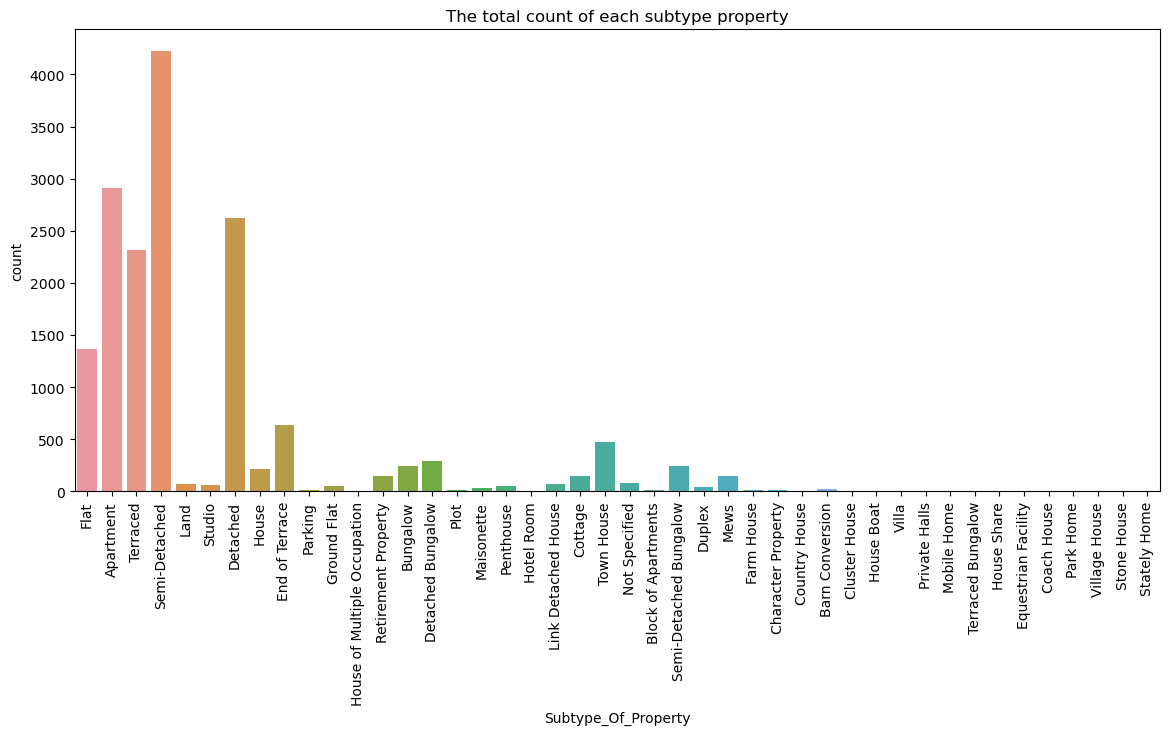

In [58]:
subtypeProp = cleanData['Subtype_Of_Property']

plt.figure(figsize = (14, 6))

sbn.countplot(data = cleanData, x = subtypeProp)

plt.title("The total count of each subtype property")
plt.xticks(rotation = 90)


plt.show()

The analysis shows that, when we dive into the different types of properties listed in our data, semi-detached houses stand out as the most common in today's real estate market. This popularity likely stems from the high number of houses in the Greater Manchester region, especially when compared to the more rural areas. It hints at a clear preference for or a higher availability of semi-detached houses in the urban or densely populated parts of the Greater Manchester region.

### What is the correlation between the house features and the display price

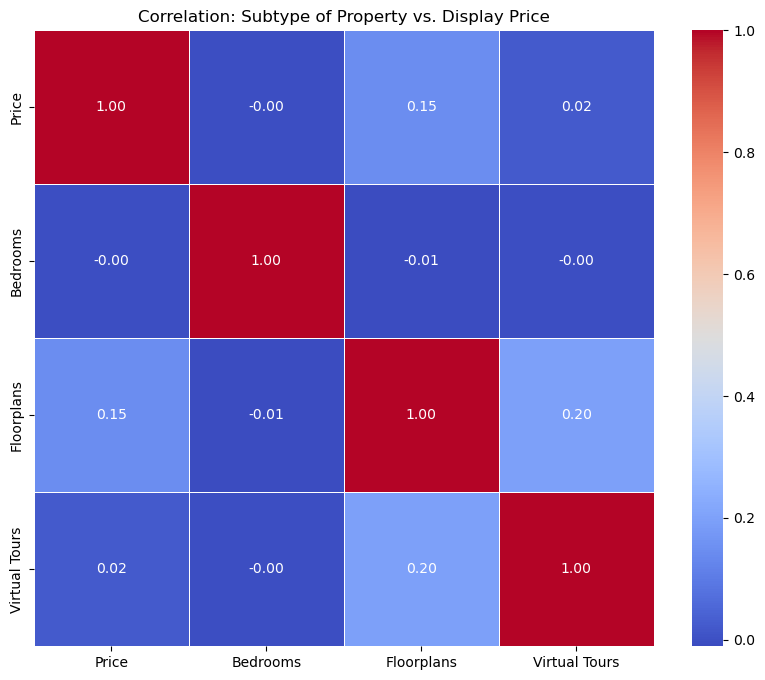

In [88]:
# Create a new DataFrame with the encoded subtype and jittered values
heatmap_data = pd.DataFrame({'Price': cleanData['Display_Price'], 'Bedrooms': cleanData['Number_Of_Bedrooms'], 'Floorplans': cleanData['Number_Of_Floorplans'], 
                             'Floorplans': cleanData['Number_Of_Floorplans'], 'Virtual Tours': cleanData['Number_Of_Virtual_Tours']})

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Set plot labels and title
plt.title('Correlation: Subtype of Property vs. Display Price')

# Show the plot
plt.show()

The heatmap we've presented provides valuable insights into how different listing features relate to property prices, giving it a more human touch. Overall, it seems that the connection between the number of listing features and prices isn't particularly strong, as shown by the relatively low correlation scores. This suggests that just having more features doesn't consistently mean higher property prices. However, it's interesting to note that among the features we looked at, floorplans and virtual tours seem to have the strongest connection with prices, scoring just under 0.2 on the correlation scale. While this correlation is somewhat modest, it does point to a noticeable positive link. Homes or properties that include detailed floorplans and virtual tours in their listings tend to, on average, fetch slightly higher prices. The significance of floorplans and virtual tours in influencing property prices likely comes from their ability to offer prospective buyers a more immersive and comprehensive understanding of the property. A well-crafted floorplan helps potential buyers visualize the spatial layout and flow of the property, and virtual tours provide a virtual walkthrough experience, allowing buyers to explore the property from the comfort of their own homes.

### Create a Graph plot that based on the price over timeprint(cleanData['Display_Price'].unique())

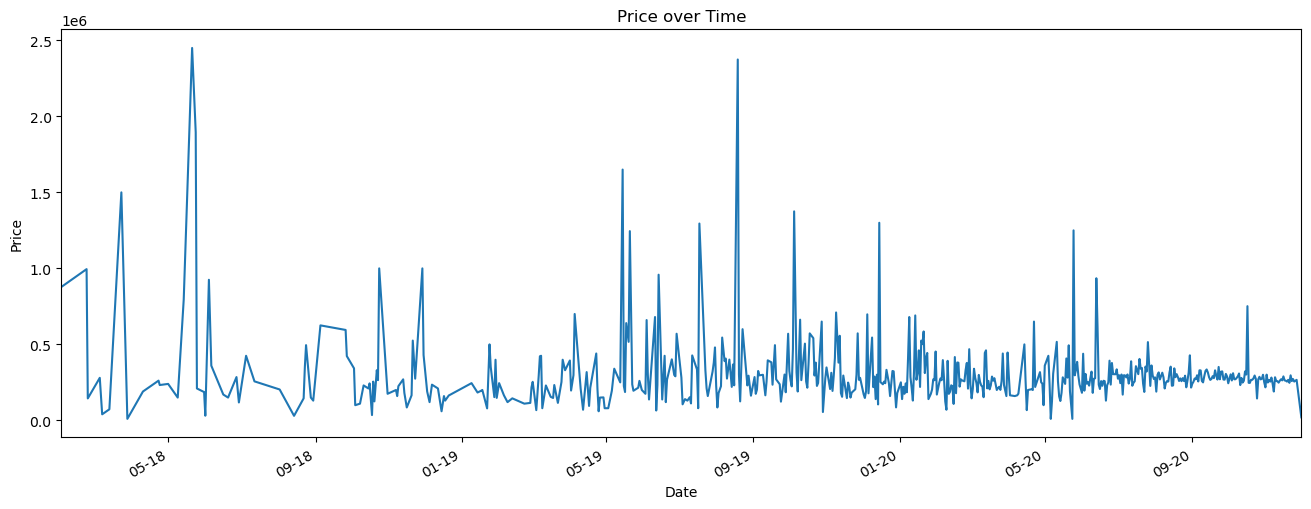

In [118]:
avg_by_date = cleanData.groupby('Date_Added')['Display_Price'].mean().reset_index()

plt.figure(figsize=(16, 6))
sbn.lineplot(data=avg_by_date, x='Date_Added', y='Display_Price')

# Formatting date on x-axis
plt.gca().xaxis.set_major_formatter(DateFormatter('%m-%y'))
plt.gcf().autofmt_xdate()  # Rotate and align the dates for better readability

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price over Time')

# Zoom in on a specific date range
start_date = '02-2018'
end_date = '12-2020'
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))  # Convert string to Timestamp

# Show the plot
plt.show()

The journey of house prices in Manchester over the months and years paints a picture of consistent affordability for the city, with a noteworthy surge only happening in 2018 and 2019, resulting in a substantial 2.5-fold increase. This stability owes itself to several factors, like the city's economic resilience and a steady job market. The ups and downs we notice, both big and small, might signify unique market dynamics. The peak in 2018-2019 implies heightened demand, possibly fueled by better economic conditions, a growing population, or specific local developments. The smaller spikes in the years leading up to the COVID-19 pandemic could be attributed to increased property purchases, possibly influenced by favorable lending conditions, a boost in consumer confidence, or tempting investment opportunities during that period. The revelation that people were snapping up properties at a faster pace pre-COVID aligns with the robust real estate market during those years. However, the analysis rightly points out a minor blip in prices during early to late 2020, likely due to the impact of COVID-19 restrictions on property transactions. Lockdowns, economic uncertainties, and job losses may have all played a part in putting the brakes on the market's usual momentum.

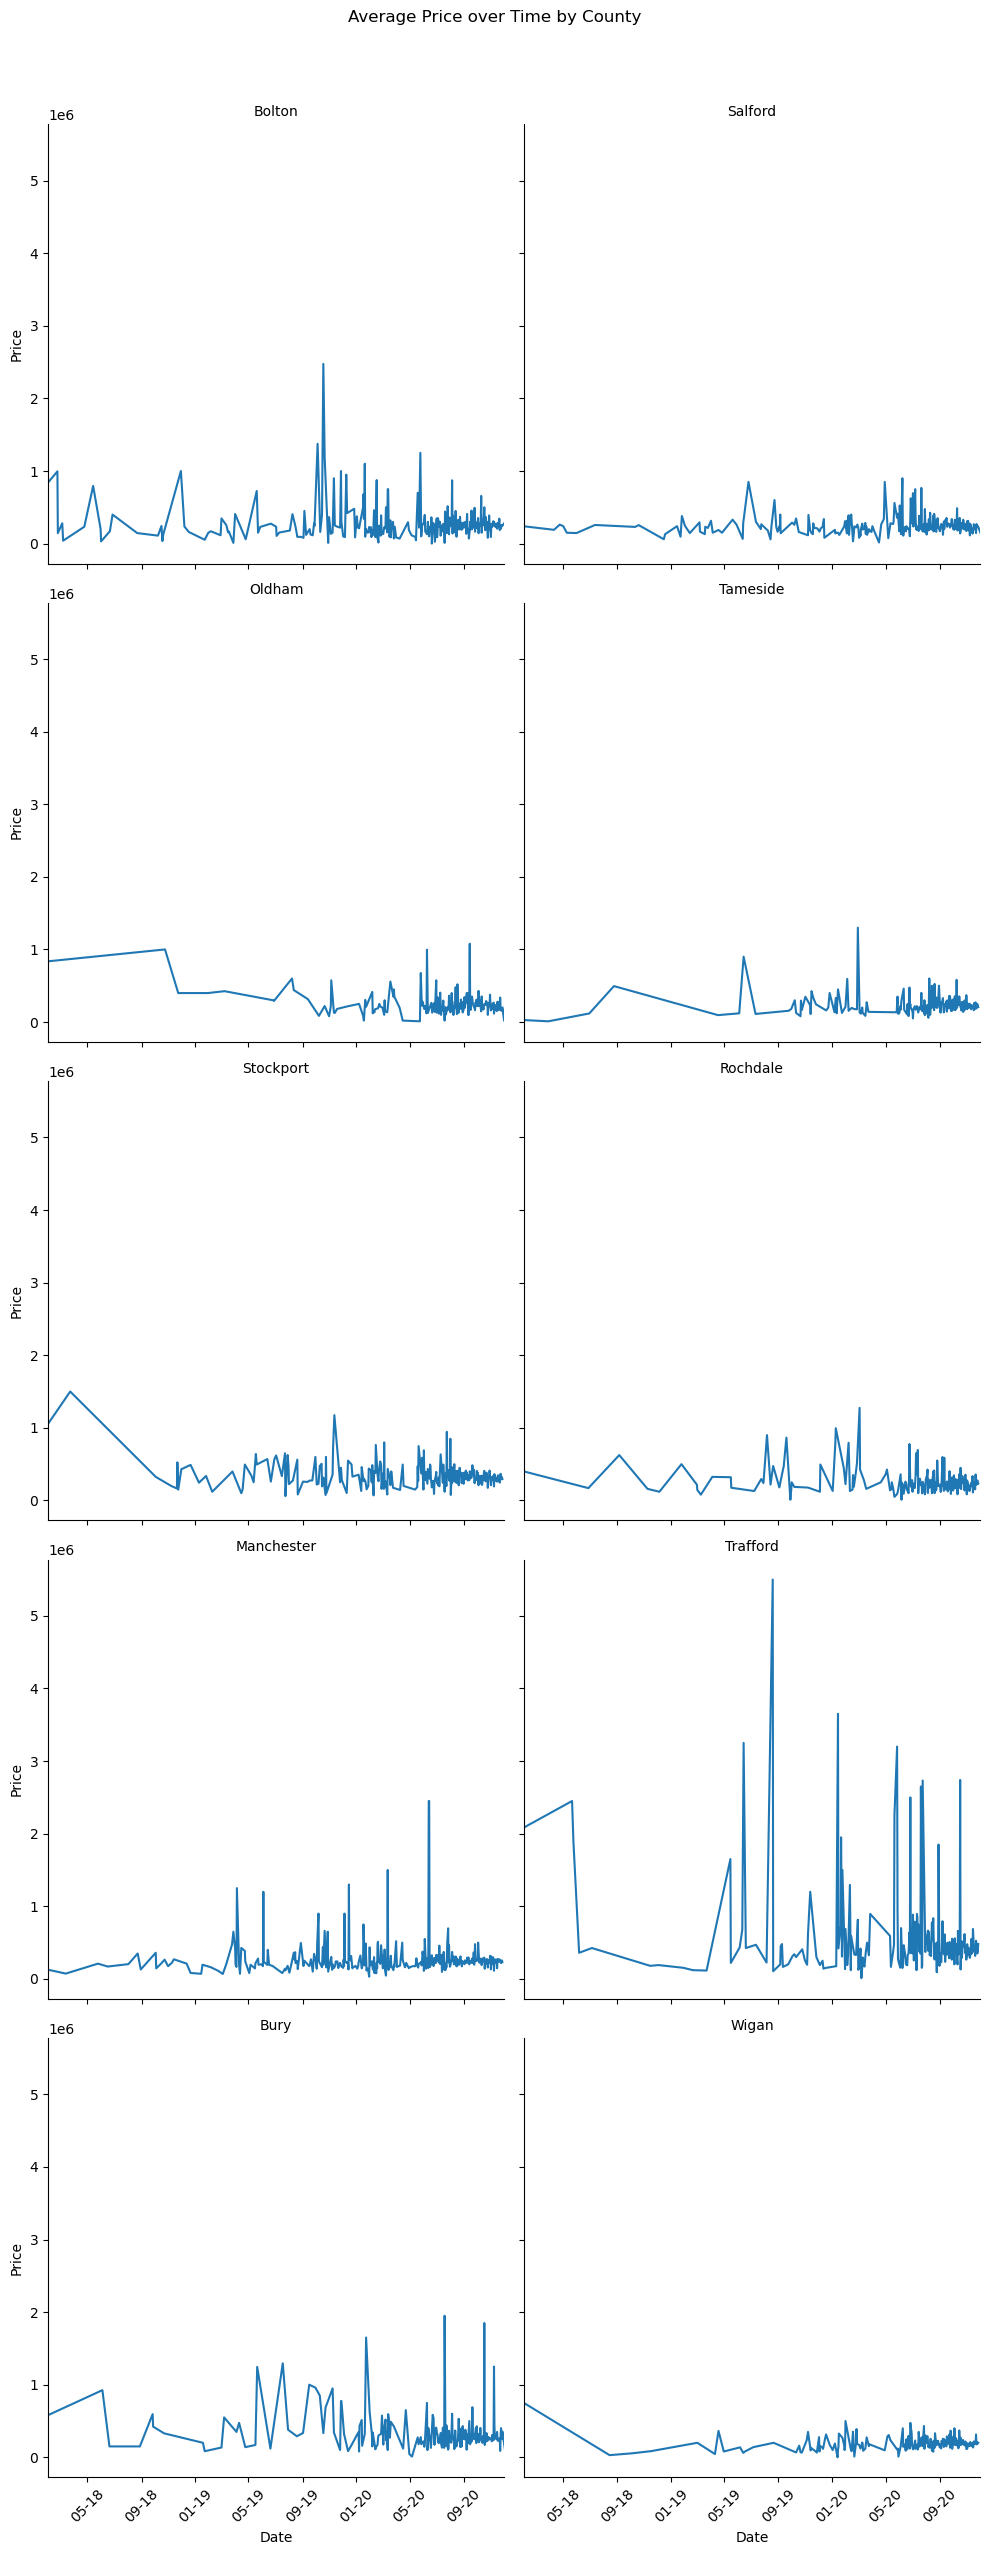

In [124]:
# Group by date and county, calculate the mean of display prices
avg_by_date_or_county = cleanData.groupby(['Date_Added', 'County'])['Display_Price'].mean().reset_index()

# Create a FacetGrid
g = sbn.FacetGrid(avg_by_date_or_county, col="County", col_wrap=2, height=5)

# Map lineplot to each facet with ci=None to show averages
g.map(sbn.lineplot, "Date_Added", "Display_Price", ci=None)

# Set axis labels, titles, and figure title
g.set_axis_labels("Date", "Price")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Average Price over Time by County', y=1.02)

# Formatting date on x-axis for all subplots
for ax in g.axes:
    ax.xaxis.set_major_formatter(DateFormatter('%m-%y'))
    ax.tick_params(axis='x', rotation=45)

# Zoom in on a specific date range
start_date = '02-2018'
end_date = '12-2020'
plt.xlim(pd.Timestamp(start_date), pd.Timestamp(end_date))  # Convert string to Timestamp

plt.tight_layout()
plt.show()

The prices of houses may also be influenced by the counties within the greater city. As seen on the graphs above, Trafford (located on column 2, row 2) which consistently spikes in every year is the most expensive county in manchester. This may be a huge influx of people moving into that part of manchester 

### Boolean column analysis

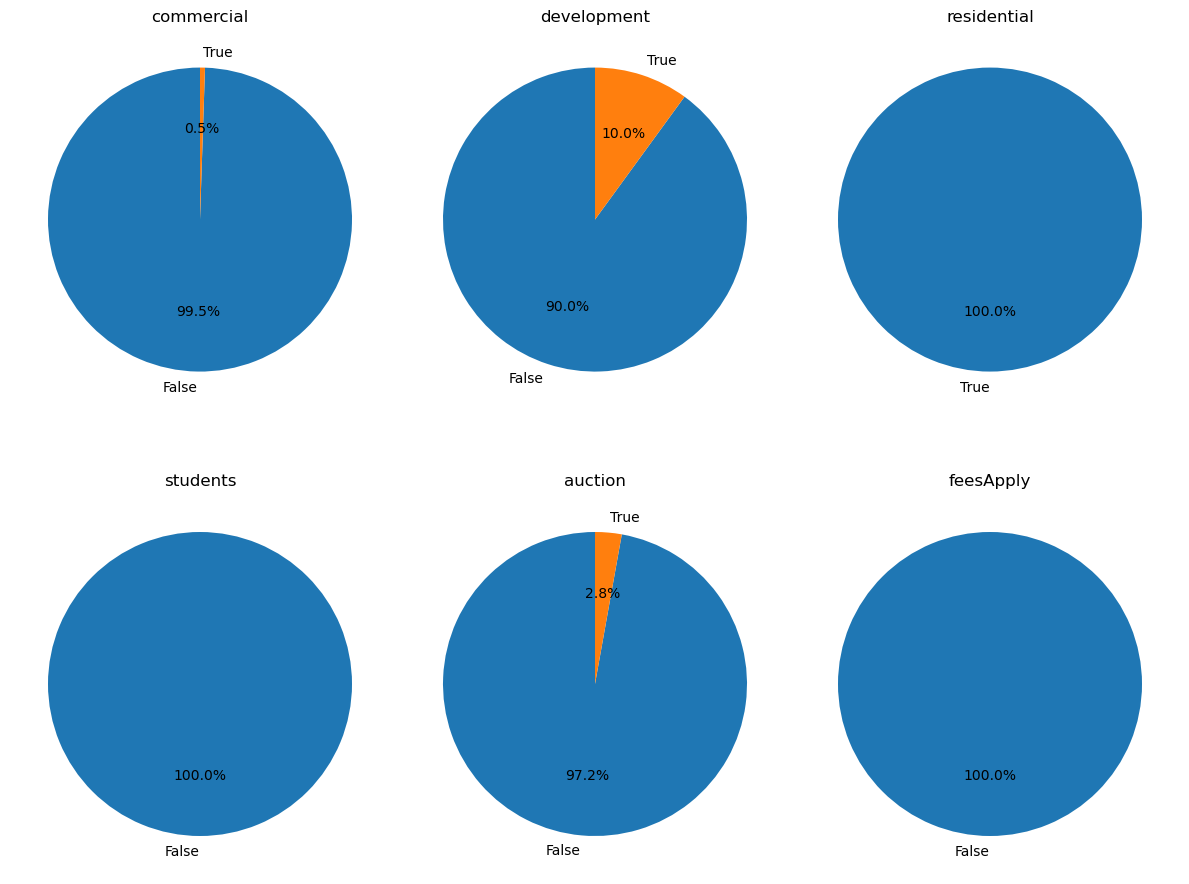

In [136]:
boolCol = ['commercial', 'development', 'residential', 'students', 'auction', 'feesApply']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))
axes = axes.flatten()

# Iterate through the elements in numberofArray
for i, element in enumerate(boolCol):
    # Calculate value counts for the current element
    elementIndex = cleanData[element].value_counts()

    # Get labels and values for the pie chart
    labels = elementIndex.index
    values = elementIndex.values

    # Plot the pie chart in the current subplot
    axes[i].pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(element)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


Looking at the provided boolean data, it's clear that the listed properties might not be the best fit for students looking for accommodation, even though technically students could still consider purchasing them. The absence of a student-friendly label suggests these properties might not cater to the specific needs of student living. Additionally, the indication that associated fees are not accurate could mean that extra costs like legal fees and water bills aren't included in the listed price. This raises the concern that the overall cost of buying the property, when factoring in these additional fees, might be too heavy for potential buyers. On a positive note, the development column shows a 10 percent to 90 percent split, revealing an active market with a substantial number of new properties being built and listed online. This not only indicates growth in the real estate sector but also provides buyers with a range of choices, from newly constructed to already established homes. The auction pie chart provides insight into the sales method, indicating that just under five percent of the properties have been sold through auctions facilitated by a building society. This might suggest a strategy employed by banks to efficiently divest properties, possibly appealing to landlords seeking investments to pay off mortgages. This adds a layer of complexity to the market, where properties are strategically allocated to different channels for sale. Finally, the commercial pie chart sheds light on properties designated for commercial use. This diversification in property purpose indicates a mixed-use real estate landscape, with some properties designed and marketed for businesses rather than residential purposes. This aligns with the broader trend of urban development incorporating both residential and commercial spaces to create more comprehensive and integrated communities.

### Has the property been Reduced or added

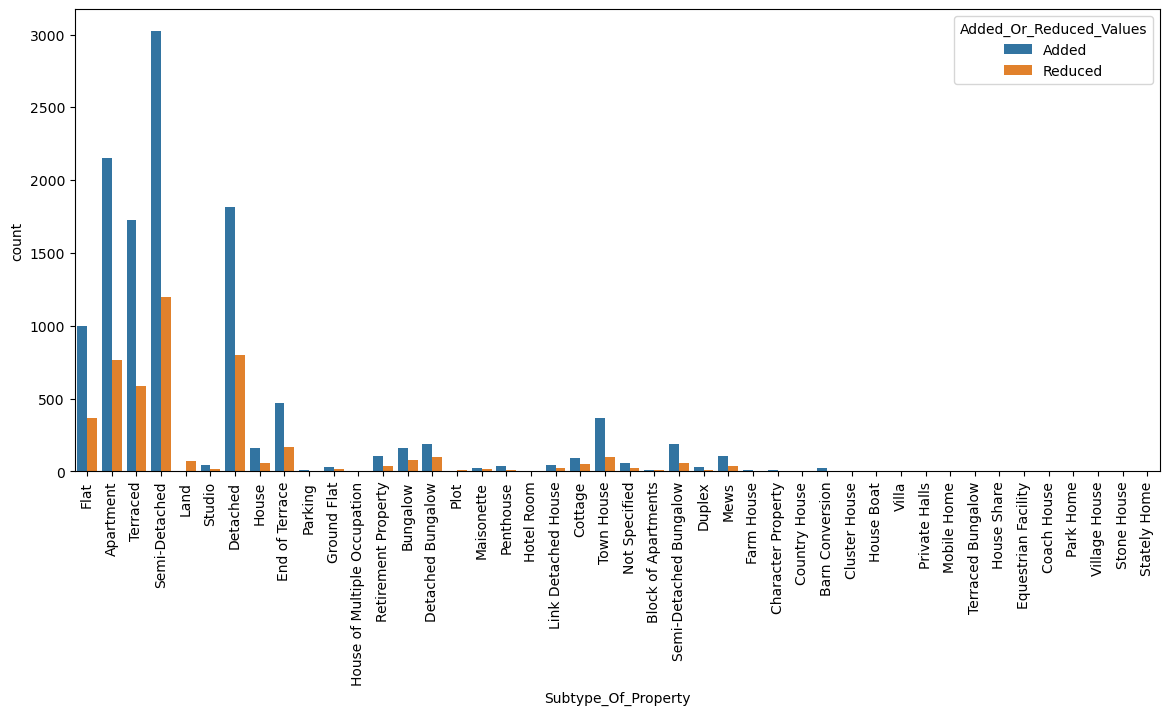

In [65]:
hasBeen = cleanData['Added_Or_Reduced_Values']

plt.figure(figsize = (14, 6))

sbn.countplot(data = cleanData, x = subtypeProp, hue = hasBeen)


plt.xticks(rotation = 90)
plt.show()

These property types stand out with the highest counts, suggesting their prevalence in the real estate market under consideration. Such prominence can serve as a valuable insight for stakeholders, indicating the significance of these property types in the overall market landscape. Semi Detached houses are often being added more due to their value and theme of the greater manchester city. as these new buildings get added it appears their reduction are also significantly high, this may due to the market being too oversaturated and so mortgage companies may want to put their prices down

### What is the percentages of the listing being premium and it also being a featured property

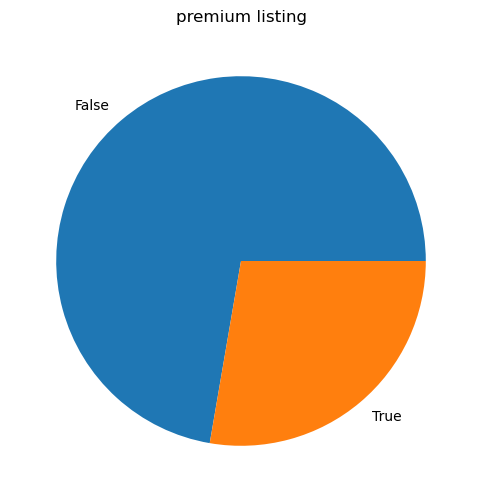

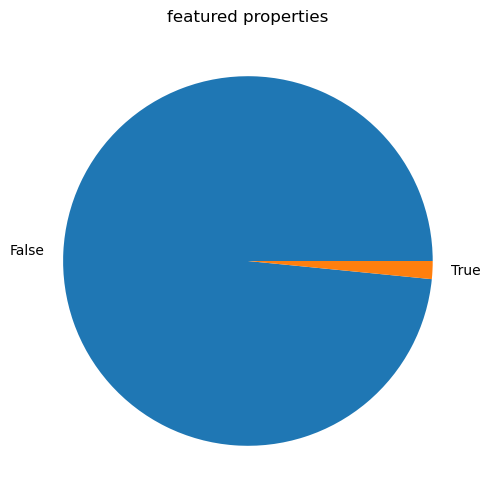

In [135]:
plt.figure(figsize = (14, 6))

plt.subplot(121)
premiumCount = cleanData['premiumListing'].value_counts()
pIndex = premiumCount.index

plt.pie(premiumCount, labels = pIndex)

plt.title('premium listing')
plt.show()

plt.figure(figsize = (14, 6))

plt.subplot(122)
featuredCount = cleanData['featuredProperty'].value_counts()
fIndex = featuredCount.index

plt.pie(featuredCount, labels = fIndex)
    
plt.title('featured properties')
plt.show()


From checking out these two pie charts, it's pretty clear that there's a bunch of fancy properties listed on the website. The thing is, only a tiny percentage of them actually get featured. Now, it could be because of some website rules or algorithms doing their thing. But what it tells us is that a lot of these properties, even the swanky ones, might not be catching the eye of the website algorithms. So, they end up missing the spotlight and hardly ever make it to the featured section. It's like they're the unsung heroes of the real estate listings, just waiting for a bit more attention.

### Create a word cloud that is based on the most common words in the summary column

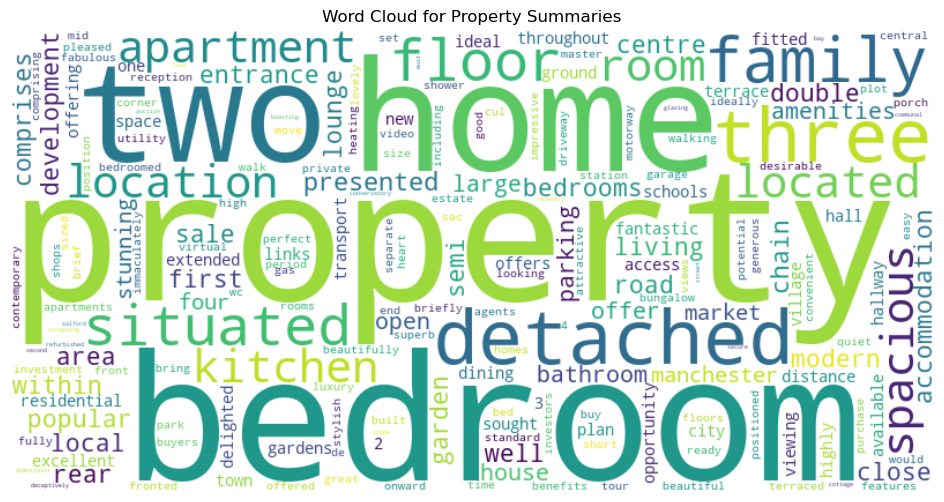

In [67]:
# Assuming 'Summary' is the column you want to analyze
cleanData['Summary'] = cleanData['Summary'].astype(str)

# Combine all summaries into a single string
all_summaries = ' '.join(cleanData['Summary'].tolist())

# Tokenize and filter stopwords
stop_words = set(stopwords.words('english'))
all_tokens = [word for word in word_tokenize(all_summaries.lower()) if word.isalnum() and word not in stop_words]

# Create a dictionary of word frequencies
word_freq = {word: count for word, count in Counter(all_tokens).items()}

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Display the Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Property Summaries')
plt.show()

# Conclusion

In our exploration of the bustling world of Greater Manchester's real estate, we've stumbled upon some captivating stories woven into the fabric of property types, market rhythms, and the dreams of future homeowners. Picture the semi-detached houses standing proud, like friendly neighbors in a lively community, stealing the spotlight with their urban charm. The heatmap, a sort of treasure map, paints a vivid picture where floorplans and virtual tours emerge as the unsung heroes, whispering tales of spatial wonder to potential buyers.

Now, imagine taking a stroll through time, navigating the peaks and valleys of Manchester's housing prices. There's a story of stability, with occasional flares of excitement. The peak in 2018-2019 feels like a grand celebration, fueled by economic joy and eager demand. The quieter spikes before the pandemic? They're like hidden chapters of a novel, revealing tales of savvy buyers seizing golden opportunities. Then, the pandemic steps in like a plot twist, gently nudging the market into a reflective pause in 2020.

Zooming into the neighborhoods, Trafford emerges as the sophisticated elder sibling, donned in the priciest attire among the counties. It's like the neighborhood where everyone aspires to live, sprinkled with a touch of prestige.

Our journey into boolean data adds a touch of mystery. The lack of a student-friendly tag and the elusive undisclosed fees hint at challenges, yet the development column tells a tale of growth and promise. It's like witnessing a town evolve, with new homes popping up like wildflowers, promising a fresh start.

In the grand finale, the pie charts paint a vivid scene. Fancy properties, like glamorous actors, wait in the wings for their moment in the spotlight. Only a few make it to the coveted "featured" section, leaving the rest as hidden gems, waiting for that special someone to discover their unique charm.

As we wrap up our notebook journey, we find ourselves at the crossroads of data and storytelling. The heartbeat of Greater Manchester's real estate market echoes with the tales of homes, dreams, and the ever-changing winds of opportunity. It's a symphony of stories, and every property, from the semi-detached houses to the swanky ones lingering in the shadows, has a tale to tell.

# References

Reference to the dataset can be found here - https://www.kaggle.com/datasets/jsaizlomas/greater-manchester-properties-for-sale